# Desafío entregable #3: Estructurando un proyecto de DS, parte I

## Abstract

#### El dataset "Spotify_Track_Dataset” está compuesta por una muestra de 114.000 canciones que fueron seleccionadas del servicio de streamming de música Spotify, el cual posee más de 80 millones de canciones y podcasts. Este dataset posee 21 columnas que describen cada canción, entre dichas columnas se encuentra el nombre de la canción, su intérprete, álbum, duración y una serie de parámetros numéricos que dan información sobre el volumen, la energía que transmite, el carácter instrumental, la presencia de palabra hablada o cantanda, entre otras.

#### Por lo visto en las dos entregas anteriores y que reforzaremos en la actual entrega, el dataset posee potencial para establecer un sistema de clasificación de las canciones que no se base solamente en su género musical, sino que incluya criterios tales como música bailable, para relajación, apta para menores, etcétera. Tal sistema de clasificación da pie para luego crear un sistema de recomendación que ofrezca una lista de canciones que se adecue a los gustos y preferencias particulares de cada usuario de la plataforma Spotify. 

#### A los fines de evaluar la factibilidad de realizar tal sistema de clasificación se plantean una serie de preguntas de interés que buscarán ser respondidas en la presente entrega.

#### - ¿Es la muestra representativa del total de las canciones del servicio Spotify? 
#### Dado que no se dispone de información de cómo se seleccionaron las canciones que están presentes en el dataset, resulta relevante realizar un análisis exploratorio buscando identificar como fueron elegidas las canciones. Esto es crítico ya que dicha muestra puede no ser una buena representación de la población, dando lugar a posibles sesgos.

#### - ¿Los datos están completos y bien formateados?
#### Si bien esta pregunta siempre estuvo en mente desde la primera entrega, en esta ocasión se hará un análisis un tanto más profundo, identificando la presencia de valores NaN o Null y chequeando que los datos categóricos tengan uniformidad, es decir, que no existan diferencias tales como “led zeppelin”, “led_zeppelin”, “Led zeppelin”, “Led Zeppelin”, etcétera.

#### - ¿Hay diferencias estadísticas significativas entre los diferentes parámetros que clasifican las canciones?
#### Comprobar si las canciones poseen diferencias palpables entre sus parámetros es fundamental ya que dichas diferencias serán la base sobre la cual el sistema de clasificación va a operar. Se especula que a mayores diferencias más robusto será el sistema de clasificación.

#### - ¿Cuáles son las correlaciones en los diferentes parámetros?
#### Explorar las correlaciones entre las diferentes variables es básico y fundamental de todo análisis exploratorio de datos, en este dataset las correlaciones ya sean positivas como negativas nos ayudaran a seleccionar valores de parámetros deseables que cumplan con las preferencias de los usuarios. Por ejemplo, si un usuario prefiere canciones enérgicas posiblemente busque canciones con altos valores de tempo y valencia. 

#### El sólo hecho de buscar responder estas preguntas nos servirá de guía para realizar el análisis exploratorio de los datos, el procesamiento de éstos y pistas sobre cuales algoritmos de machine learning utilizar para el sistema de clasificación.

##### Referencias
##### https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset
##### https://newsroom.spotify.com/company-info/


## Importo paquetes y el dataset

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df = pd.read_csv('Spotify_Track_Dataset.csv')

## Recordando las características y estructura del dataset

In [53]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [54]:
print(df.shape, "\n")
print(df.columns, "\n")
print(df['track_genre'].unique(), "\n")
print('Hay ' + str(len(df['track_genre'].unique())) + ' géneros musicales en el dataset.')

(114000, 21) 

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object') 

['acoustic' 'afrobeat' 'alt-rock' 'alternative' 'ambient' 'anime'
 'black-metal' 'bluegrass' 'blues' 'brazil' 'breakbeat' 'british'
 'cantopop' 'chicago-house' 'children' 'chill' 'classical' 'club' 'comedy'
 'country' 'dance' 'dancehall' 'death-metal' 'deep-house' 'detroit-techno'
 'disco' 'disney' 'drum-and-bass' 'dub' 'dubstep' 'edm' 'electro'
 'electronic' 'emo' 'folk' 'forro' 'french' 'funk' 'garage' 'german'
 'gospel' 'goth' 'grindcore' 'groove' 'grunge' 'guitar' 'happy'
 'hard-rock' 'hardcore' 'hardstyle' 'heavy-metal' 'hip-hop' 'honky-tonk'
 'house' 'idm' 'indian' 'indie-pop' 'indie' 'industrial' 'iranian'
 'j-dance' 'j-idol' 'j-pop' '

## Respuesta a las preguntas formuladas en el abstract

### ¿Es la muestra representativa del total de las canciones del servicio Spotify? 

##### El dataset está compuesto por canciones pertenecientes a 114 géneros musicales, sin embargo, nylon.com indica que el número de géneros asciende a más de 5071 de ellos en Spotify. Esto indica que hubo una preseleccion de temas y por lo tanto corrobaremos esto cuantificando el número de temas musicales por género. 
##### (https://www.nylon.com/entertainment/how-many-spotify-genres-are-there-spotify-wrapped)

In [55]:
df.groupby('track_genre').size()

track_genre
acoustic       1000
afrobeat       1000
alt-rock       1000
alternative    1000
ambient        1000
               ... 
techno         1000
trance         1000
trip-hop       1000
turkish        1000
world-music    1000
Length: 114, dtype: int64

##### Se observa que el dataset está compuesto por mil canciones de cada género musical, esto puede ser positivo por implica que ningun género quede subrepresentado. Leyendo la lista de géneros presentes en el dataset encontramos los géneros más masivos, al menos en Argentina, por ejemplo: rock, pop, hip-hp, latino, reggae, reggaeton, etcétera. Además, considero que el número de canciones es suficiente para obtener buenos parámetros estadísticos de cada género que asistan posteriormente a la formación de un sistema de clasificación por medio de algún algoritmo de clasificación de machine learning.

##### Hacemos una representación gráfica del número de canciones por género, sin embargo, debido a que son tantos géneros, hacemos un gráfico de barras con sólo los géneros mencionados anteriormente.

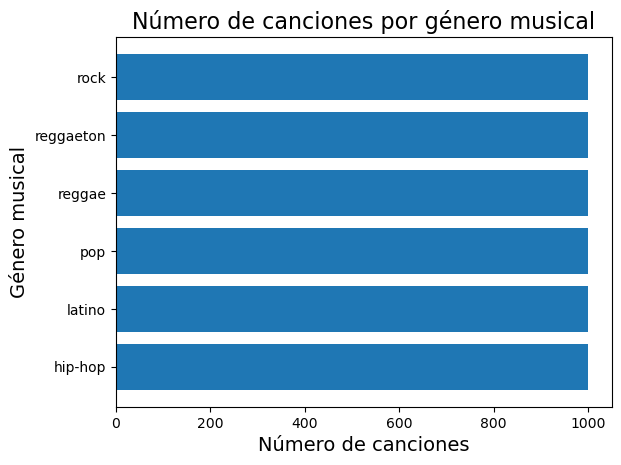

In [56]:
df_seleccion = df[df['track_genre'].isin(["rock", "pop", "hip-hop", "latino", "reggae", "reggaeton"])]

plt.barh(df_seleccion['track_genre'].unique(), df_seleccion.groupby('track_genre').size())
plt.xlabel('Número de canciones', fontsize = 14)
plt.ylabel('Género musical', fontsize = 14)
plt.title("Número de canciones por género musical", fontsize = 16)
plt.show()

### ¿Los datos están completos y bien formateados?

##### Empezaremos chequeando la existencia (o ausencia) de datos del tipo NaN

In [57]:
df.isna().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [58]:
null = df['artists'].isnull()
df[null]

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,...,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


##### Se observa que de 114.000 registros, sólo uno de ellos contiene valores NaN, lamentablemente los datos ausentes con el nombre de la canción, del artista y del álbum y además con el track_id no se pudo encontrar información respecto de este tema. Sin embargo las restantes columnas poseen datos, incluidas el género musical, por lo que aún es información útil.

##### Ahora chequearemos el formateo de los datos, especialemente en aquellas columnas que contienen datos categóricos: "artists", "album_name" y "track_name".

In [59]:
df.head(10)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
5,5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.4810,...,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic
6,6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.1470,...,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic
7,7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.4440,...,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic
8,8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,False,0.625,0.4140,...,-8.700,1,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,4,acoustic
9,9,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,56,205594,False,0.442,0.6320,...,-6.770,1,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,4,acoustic


##### Observamos que los datos están formateados de manera prolija, respetando las mayúsculas iniciales y espacio entre cada palabra. En el caso de la columna "artist" y en aquellas canciones que posean más de un autor, los autores están separados por punto y coma (;). Considero que separar los artistas y crear nuevas columnas llamadas "principal", "secondary" y "tertiary" podría ser útil.

In [100]:
df[['principal', 'secondary', 'tertiary']] = df['artists'].str.split(';', 2, expand=True)

In [94]:
df.head(5)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,instrumentalness,liveness,valence,tempo,time_signature,track_genre,principal,secondary,tertiary,forty
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,0.000001,0.3580,0.715,87.917,4,acoustic,Gen Hoshino,None,None,None
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,0.000006,0.1010,0.267,77.489,4,acoustic,Ben Woodward,None,None,None
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,0.000000,0.1170,0.120,76.332,4,acoustic,Ingrid Michaelson,ZAYN,None,None
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,0.000071,0.1320,0.143,181.740,3,acoustic,Kina Grannis,None,None,None
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,0.000000,0.0829,0.167,119.949,4,acoustic,Chord Overstreet,None,None,None


##### De esta forma separamos los autores, por ejemplo observar la canción #2. Por medio del argumendo expand=True aquellas canciones que no tengan coartistas tendrán en la columna "secondary" con valor "None". Chequeamos el número de valores "None" que poseen las nuevas columnas.

In [101]:
print(df["secondary"].isna().sum())
print(df["tertiary"].isna().sum())

83925
105037


##### Encontramos que la columna "tertiary" posee un valor menor a 114.000 (número total de canciones en el dataset), indicando que hay canciones con más de tres artistas, lo que requeriría mayor número de columnas nuevas. Para hacer esto habría que contar el número máximo de ocurrencias del punto y coma en la columna "artists" y separar en tantas columnas como sea el máximo número de punto y comas menos uno. Esta tarea quedará pendiente para una próxima entrega.

##### En resumen, el dataset ya se encuentra sólo una canción con datos ausentes, y además el formato es prolijo y consistente, requiriendo muy poco trabajo adicional de data cleaning y de data wrangling.

### ¿Hay diferencias estadísticas significativas entre los diferentes parámetros que clasifican las canciones?

##### Como se mencionó, se evaluaran los parámetros estadisticos de cada parámetro para evaluar si hay suficientes diferencias para propiciar un sistema de clasificación de canciones robusto. Los gráficos del tipo "boxplot" son perfectos para esta tarea. Graficaremos cada parámetro en función de los géneros musiciales seleccionados previamente.

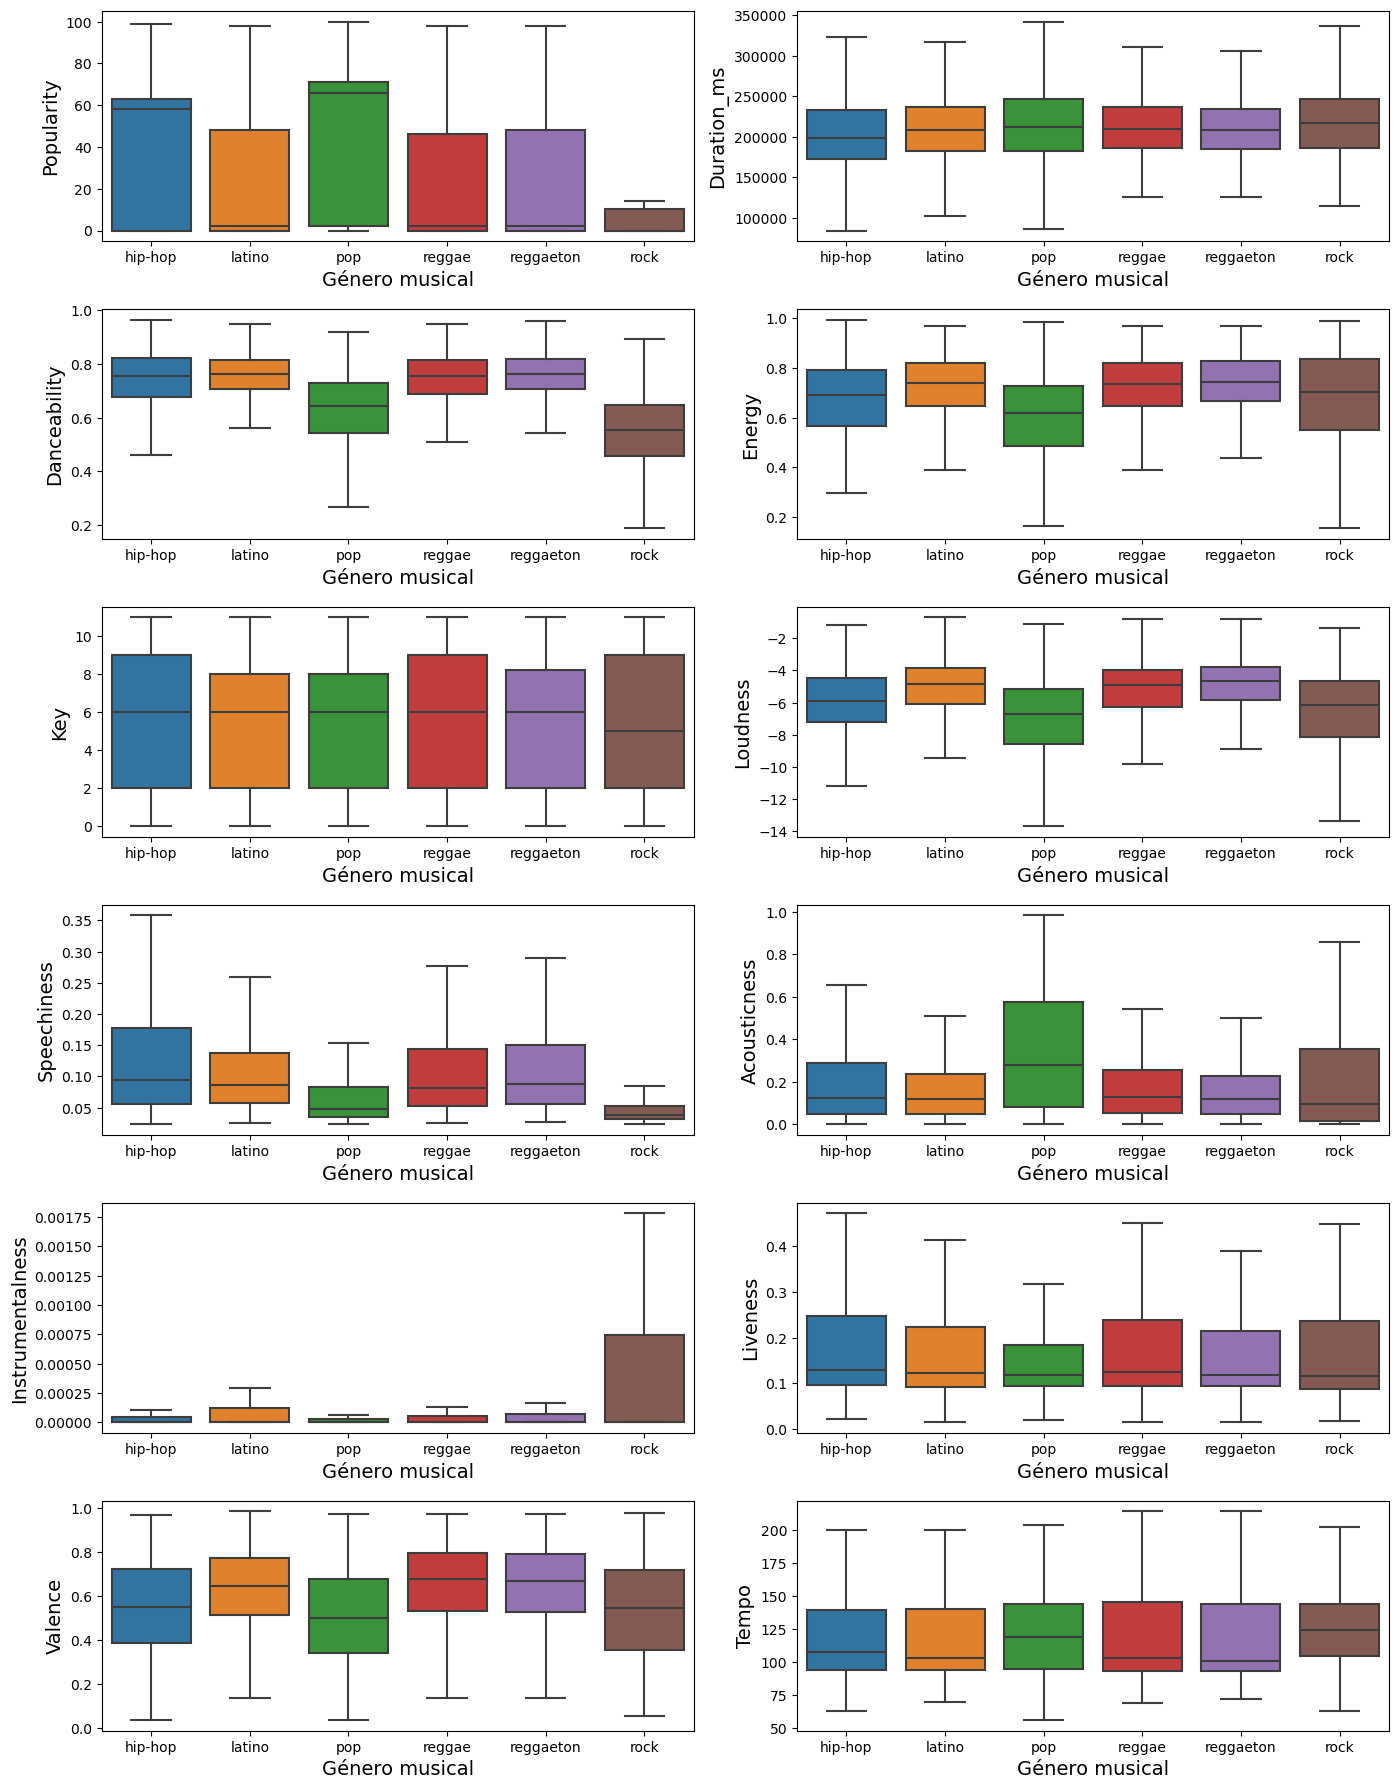

In [142]:
columns = df_seleccion.columns[5:-2] # Selecciono los parámtros que considero más relevantes

l = [i for i in columns if i not in ['explicit', 'mode']]

plt.figure(figsize = (14, 18))
      
for x, column in zip(range(12), df_seleccion[l]):
    
    plt.subplot(int(len(l)/2), 2, x+1)
    sns.boxplot(data = df_seleccion, y = column, x = df_seleccion['track_genre'], showfliers = False) 
    # Filtro los outliers porque distorsionan los gráficos, dificultando apreciar las diferencias
    
    plt.xlabel("Género musical", fontsize = 14)
    plt.ylabel(l[x].capitalize(), fontsize = 14)
    
plt.tight_layout()

##### Se observan diferencias significativas en varios de los géneros, por ejemplo compare "rock" y "pop" mientras que otros casos las diferencias son muy sutiles, comparar en este caso "reggae" y "reggaeton". Esto podría hacer que el algoritmo de clasificación separe fácilmente canciones de géneros dísimiles mientras que canciones con parámetros similares sean clasificadas como similares. Esto podria ser positivo para el sistema de recomendación, identificaría fácilemente canciones similares y las recomendaría al usuario.  

## ¿Cuáles son las correlaciones en los diferentes parámetros?

##### Las correlaciones se pueden calcular fácilmente con el comando .corr y ser graficadas de forma conveninete por medio de heatmaps.

In [154]:
df1 = df.drop(['Unnamed: 0', 'key', 'explicit', 'mode', 'time_signature'], axis = 1) 
df1.corr().round(2)

,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
popularity,1.00,-0.01,0.04,0.00,0.05,-0.04,-0.03,-0.10,-0.01,-0.04,0.01
duration_ms,-0.01,1.00,-0.07,0.06,-0.00,-0.06,-0.10,0.12,0.01,-0.15,0.02
danceability,0.04,-0.07,1.00,0.13,0.26,0.11,-0.17,-0.19,-0.13,0.48,-0.05
energy,0.00,0.06,0.13,1.00,0.76,0.14,-0.73,-0.18,0.18,0.26,0.25
loudness,0.05,-0.00,0.26,0.76,1.00,0.06,-0.59,-0.43,0.08,0.28,0.21
speechiness,-0.04,-0.06,0.11,0.14,0.06,1.00,-0.00,-0.09,0.21,0.04,0.02
acousticness,-0.03,-0.10,-0.17,-0.73,-0.59,-0.00,1.00,0.10,-0.02,-0.11,-0.21
instrumentalness,-0.10,0.12,-0.19,-0.18,-0.43,-0.09,0.10,1.00,-0.08,-0.32,-0.05
liveness,-0.01,0.01,-0.13,0.18,0.08,0.21,-0.02,-0.08,1.00,0.02,0.00
valence,-0.04,-0.15,0.48,0.26,0.28,0.04,-0.11,-0.32,0.02,1.00,0.08


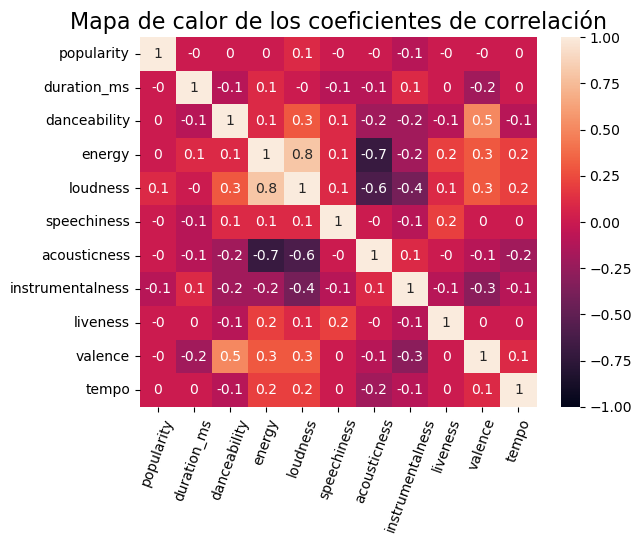

In [164]:
sns.heatmap(df1.corr().round(1), vmin=-1, vmax=1, cbar = True, annot=True)
plt.xticks(rotation = 70)
plt.title('Mapa de calor de los coeficientes de correlación', fontsize = 16)
plt.show()

##### Obeservamos correlaciones positivas y negativas como también pares de variables con correlación cero. Esta información debe ser considerada a la hora de entrenar el algoritmo de machine learning de clasificación de las canciones. Se hizo este analisis en la entrega anterior, por lo que citamos:
##### "Por ejemplo, si un usuario busca canciones para relajarse posiblemente debamos descartar canciones de altos valores de energy, loudness y tempo, estas variables se correlacionan negativamente con la variable acousticness. Por lo tanto, las canciones con alto valor de acousticness posiblemente sean buenas opciones para los usuarios en busca de canciones relajantes."

## Resumen

##### El dataset es una muestra con cierta representatividad del total de canciones del servicio Spotify, el archivo .csv contiene un total de 114.000 canciones, distribuyendo 1000 canciones por cada uno de los géneros. Los datos están completos y con formato uniforme que facilita el análisis e interpretación de los mismo, requiriendo poco trabajo de data cleanning. Por último, dadas las diferencias estadisticas y las correlaciones entre los distintos parámetros clasificatorios de las canciones se considera que es posible crear un sistema de clasificación y de recomendación de canciones.